# Import Libraries / Files

In [37]:
#import libraries
import os
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('popular', quiet=True)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold


lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
#mount drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [39]:
#variable storing the path to the dataset folder
file_path = "/content/drive/MyDrive/website_dataset"

In [40]:
#getting the list of alll files in the folder
filelist = [file for file in os.listdir(file_path) if not file.startswith('.ipynb_checkpoints') ]
filelist

['Dataset1',
 'Dataset2',
 'Dataset3',
 'Dataset5',
 'Dataset4',
 'Dataset6',
 'Dataset7',
 'Dataset8',
 'Dataset9',
 'Dataset10',
 'Dataset11',
 'Dataset12',
 'Dataset13',
 'Dataset14',
 'Dataset15',
 'Dataset17',
 'Dataset18',
 'Dataset19_pdf',
 'Dataset16']

In [41]:
#merging all the web scraping data files
df_concat = pd.concat([pd.read_csv(file_path + "/" + f) for f in filelist], ignore_index=False)
df_concat.drop('Unnamed: 0', axis=1, inplace=True)#dropping the unnecessary column
df_concat

,Text
0,"Virtual Reality (VR) use is growing, and the m..."
1,Misinformation has become increasingly salient...
2,"Research on VR and misinformation is scarce, b..."
3,The concept of affordances is vital for unders...
4,VR has the potential to bring about significan...
...,...
25,"It is not important at all. In fact, it will b..."
26,What makes you think you should? I’m not sayin...
27,i can't think of one reason why you should. Bu...
28,Wrong person to ask since I don’t care bout th...


# Sentence Tokenization

**Sentence Tokenization**: This is a natural language process that involves splitting paragraphs into sentences so it is easier to derive meaning from them.


In [42]:
#tokenizining each row of paragraph
sentence_tokenizer = []
for i in df_concat['Text']:
   tokenizer = nltk.sent_tokenize(i)

# Print the extracted sentences
   for sentence in tokenizer:
    sentence_tokenizer.append(sentence)
len(sentence_tokenizer)


3493

In [43]:
#converting to dataframe
df_sentence = pd.DataFrame(sentence_tokenizer, columns = ['Text'])
df_sentence.head(5)

,Text
0,"Virtual Reality (VR) use is growing, and the m..."
1,The positive applications of this technology h...
2,"One such use-case is VR exposure therapy, wher..."
3,"Another is as an educational tool, where VR ha..."
4,"However, there is a growing concern that these..."


In [44]:
#storing in a csv file
df_sentence.to_csv("Website_Dataset.csv")

# Data Cleaning

**Data Cleaning**: This involves making sure the data is free from errors or bias by removing punctuations, stop words and so on.

In [45]:
stemmer = SnowballStemmer("english")
#assigning the english stop words to a variable
stop_words = stopwords.words("english")
#adding common words to the stop words dictionary
stop_words.extend(["say", "like", "year", "could", "would","metaverse", "augmented", "reality", "facebook", "company", "meta", "virtual",
                   "technology", "people", "world", "ai", "artificial", "intelligence", "headset", "said", "also",  "user", "zuckerberg", "platform",
                   "time", "tech", "platform", "social", "real"])
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r"[^\w\s]", " ", text)
    # tokenize sentence into words
    tokens = word_tokenize(text)
    #normalizing by doing lemmatization and removing stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    # Join tokens back into a string
    text = " ".join(tokens)
    return text

In [46]:
#calling the clean_text function
clean = []
for i in df_sentence['Text']:
  clean.append(clean_text(i))
df_sentence['clean']=clean


In [47]:
#viewing the dataframe
df_sentence.head(5)

,Text,clean
0,"Virtual Reality (VR) use is growing, and the m...",growing medium becoming ever immersive creatin...
1,The positive applications of this technology h...,positive application grown popularity
2,"One such use-case is VR exposure therapy, wher...",case exposure therapy patient make full unique...
3,"Another is as an educational tool, where VR ha...",another educational tool shown effective promo...
4,"However, there is a growing concern that these...",however growing concern immersive property use...


In [48]:
#converting dataframe to csv file
df_sentence.to_csv('Cleaned_websitedataset')

#Data Labeling

**Data Labeling**

Using Vader sentiment analyzer

In [49]:
sentiment2 = [] #assigning an empty list where all sentiments will be added
for i in df_sentence['clean']:
    #calling the sentiment analyzer
    scores = analyzer.polarity_scores(i)
    if scores['compound'] > 0:
      sentiment = 'positive'
    elif scores['compound'] < 0:
      sentiment = 'negative'
    else:
      sentiment = 'neutral'
    sentiment2.append(sentiment)
df_sentence['Sentiment']=sentiment2

df_sentence.head(5)

,Text,clean,Sentiment
0,"Virtual Reality (VR) use is growing, and the m...",growing medium becoming ever immersive creatin...,positive
1,The positive applications of this technology h...,positive application grown popularity,positive
2,"One such use-case is VR exposure therapy, wher...",case exposure therapy patient make full unique...,negative
3,"Another is as an educational tool, where VR ha...",another educational tool shown effective promo...,positive
4,"However, there is a growing concern that these...",however growing concern immersive property use...,negative


In [50]:
#assign numerical labels based on sentiments
label = []
for i in df_sentence['Sentiment']:
  if i == "positive":
      labl = 1
  elif i == "negative":
      labl = -1
  else:
    labl = 0
  label.append(labl)
df_sentence['label'] = label

In [51]:
df_sentence.head(20)

,Text,clean,Sentiment,label
0,"Virtual Reality (VR) use is growing, and the m...",growing medium becoming ever immersive creatin...,positive,1
1,The positive applications of this technology h...,positive application grown popularity,positive,1
2,"One such use-case is VR exposure therapy, wher...",case exposure therapy patient make full unique...,negative,-1
3,"Another is as an educational tool, where VR ha...",another educational tool shown effective promo...,positive,1
4,"However, there is a growing concern that these...",however growing concern immersive property use...,negative,-1
5,"The current information ecosystem, which inclu...",current information ecosystem includes text im...,positive,1
6,The potency of immersive VR makes the potentia...,potency immersive make potential manipulative ...,positive,1
7,By examining VR’s various features and afforda...,examining various feature affordances research...,negative,-1
8,This analysis can help inform trust and safety...,analysis help inform trust safety measure plat...,positive,1
9,Misinformation has become increasingly salient...,misinformation become increasingly salient tod...,negative,-1


In [52]:
df = pd.read_csv("/content/Negative_Dataset")
df.drop('Unnamed: 0', axis=1, inplace=True)#dropping the unnecessary column
df

,Text,clean,Sentiment,label
0,"As a result, what little that is emerging is l...",result little emerging lack novelty seen secon...,negative,-1
1,I have been involved in digital identity since...,involved digital identity since dawn commerce ...,negative,-1
2,"Secondly and more subtly, blockchain and decen...",secondly subtly blockchain decentralisation te...,negative,-1
3,There will be less trust and more abuse.”,le trust abuse,negative,-1
4,“The ‘metaverse’ is straight up cyberpunk dys...,straight cyberpunk dystopian nonsense,negative,-1
...,...,...,...,...
149,While we acknowledge that it may be worthwhile...,acknowledge worthwhile formal manipulation che...,negative,-1
150,"For example, presenting a manipulation check ...",example presenting manipulation check prior fo...,negative,-1
151,"Additionally, even a seemingly failed manipul...",additionally even seemingly failed manipulatio...,negative,-1
152,"In addition, because labora­ tory experiments ...",addition labora tory experiment high internal ...,negative,-1


In [53]:
#combining the generated negative dataset to the existing dataset/dataframe
df_sentence = pd.concat([df_sentence, df], ignore_index=True)


In [69]:
#convert to csv to use in the merged dataset
df_sentence.to_csv("Website_dataset_update.csv")

# Exploratory Data Analysis

**Exploratory Data Analysis**: This helps in data understanding and ensuring that there are no duplicates or null values. It is also used for data visualization.

In [55]:
#getting a brief overview of the dataset
df_sentence.describe()

,label
count,3647.000000
mean,0.209487
std,0.777486
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [56]:
#checking for null values
df_sentence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       3647 non-null   object
 1   clean      3647 non-null   object
 2   Sentiment  3647 non-null   object
 3   label      3647 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 114.1+ KB


In [57]:
#checking the shape (rows and columns)
df_sentence.shape

(3647, 4)

In [58]:
#checking for duplicates
df_sentence.nunique()

Text         3584
clean        3537
Sentiment       3
label           3
dtype: int64

In [59]:
#viewing the duplicates
duplicates = df_sentence[df_sentence.duplicated(subset=['Text'], keep='last')]
print(duplicates)


                                                   Text  \
249                              What is the metaverse?   
291                Follow Newsbeat onTwitterandYouTube.   
292   Listen to Newsbeatliveat 12:45 and 17:45 weekd...   
305   Instead of being on a computer, in the metaver...   
306   But because it's still just an idea, there's n...   
...                                                 ...   
3453                        It's just another buzzword.   
3454  It’s a gimmick to put more advertising in fron...   
3497   “The ‘metaverse’ is straight up cyberpunk dys...   
3498  If I’m wrong about it not being a thing, it is...   
3529  We’re still struggling with AR/VR as well as b...   

                                                  clean Sentiment  label  
249                                                       neutral      0  
291                 follow newsbeat ontwitterandyoutube   neutral      0  
292       listen newsbeatliveat weekday listen backhere   neutral 

In [60]:
#dropping the duplicates
df_sentence = df_sentence.drop_duplicates(subset=['Text'], keep='last')
df_sentence

,Text,clean,Sentiment,label
0,"Virtual Reality (VR) use is growing, and the m...",growing medium becoming ever immersive creatin...,positive,1
1,The positive applications of this technology h...,positive application grown popularity,positive,1
2,"One such use-case is VR exposure therapy, wher...",case exposure therapy patient make full unique...,negative,-1
3,"Another is as an educational tool, where VR ha...",another educational tool shown effective promo...,positive,1
4,"However, there is a growing concern that these...",however growing concern immersive property use...,negative,-1
...,...,...,...,...
3642,While we acknowledge that it may be worthwhile...,acknowledge worthwhile formal manipulation che...,negative,-1
3643,"For example, presenting a manipulation check ...",example presenting manipulation check prior fo...,negative,-1
3644,"Additionally, even a seemingly failed manipul...",additionally even seemingly failed manipulatio...,negative,-1
3645,"In addition, because labora­ tory experiments ...",addition labora tory experiment high internal ...,negative,-1


In [61]:
#checking if duplicates were removed
df_sentence.shape

(3584, 4)

In [62]:
#getting the number of each individual sentiment
sentiments = df_sentence['Sentiment'].value_counts()
sentiments

Sentiment
positive    1542
neutral     1259
negative     783
Name: count, dtype: int64

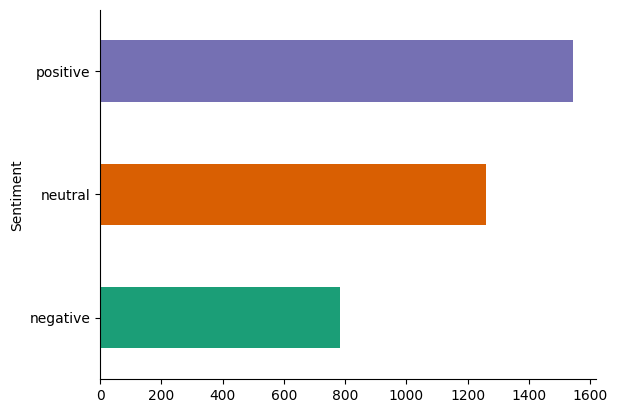

In [63]:
#visualizing the number of the sentiments on a bar plot
from matplotlib import pyplot as plt
import seaborn as sns
df_sentence.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

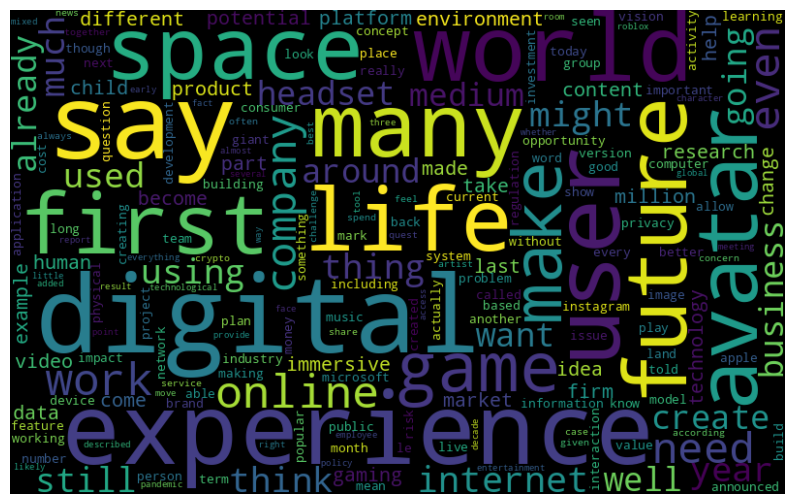

In [64]:
#this is used to know the most important concepts in the dataset
all_words = ' '.join([text for text in df_sentence['clean']])
#The WordCloud library typically expects a single string where words are separated by spaces, and it uses the frequency of each word to generate a word cloud visualization.
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

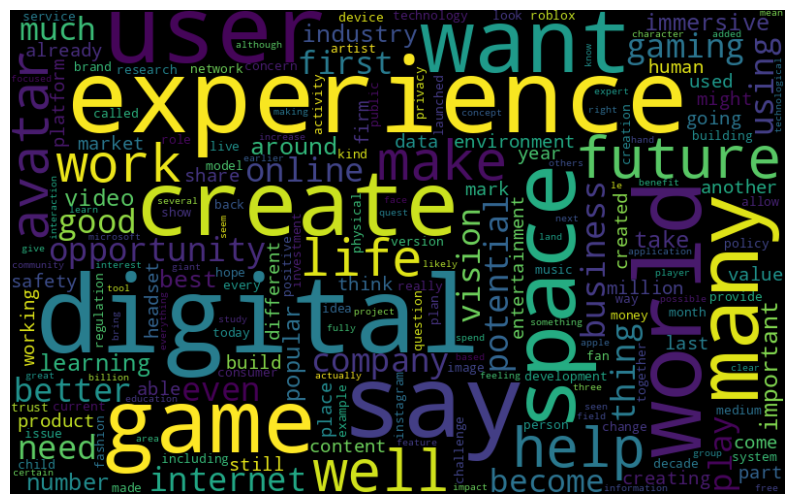

In [65]:
#this is used to visualize the most popular positive words/expressions in the dataset
normal_words_pos =' '.join([text for text in df_sentence['clean'][df_sentence['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_pos)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

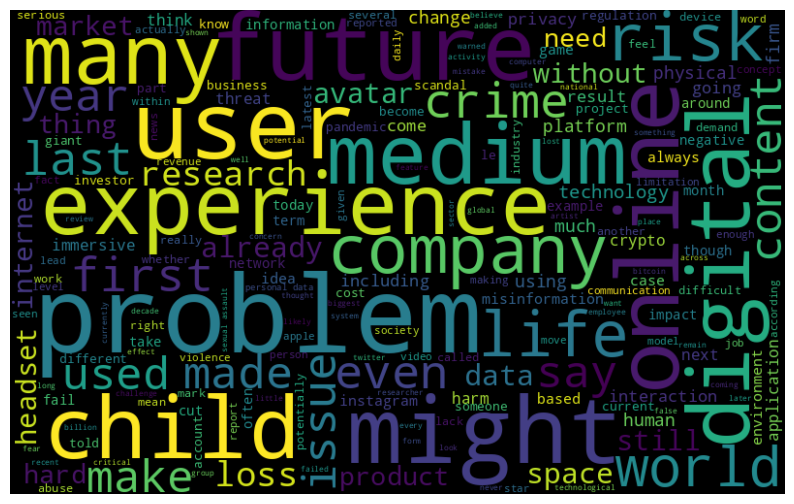

In [66]:
#this is used to visualize the most popular negative words/expressions in the dataset
normal_words_neg =' '.join([text for text in df_sentence['clean'][df_sentence['Sentiment'] == 'negative']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_neg)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

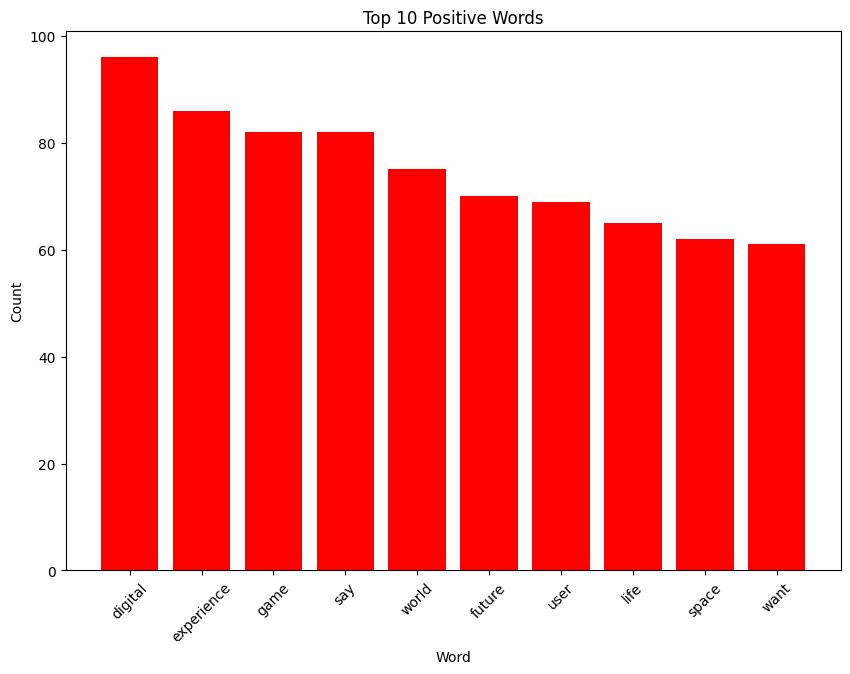

In [67]:
#visualize top 10 positive words
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the text
words = normal_words_pos.split()

# Count the frequency of each word
word_counts = Counter(words)

# Select the top 10 most frequent positive words
top_positive_words = word_counts.most_common(10)

# Extract words and their counts
positive_words = [word[0] for word in top_positive_words]
counts = [word[1] for word in top_positive_words]

# Plot a bar chart
plt.figure(figsize=(10, 7))
plt.bar(positive_words, counts, color='red')
plt.title('Top 10 Positive Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


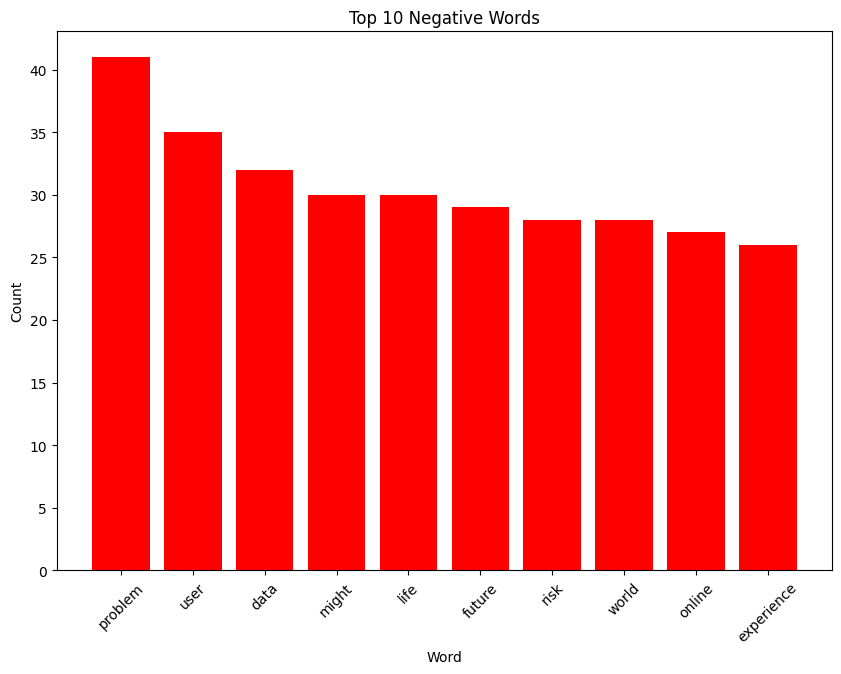

In [68]:
#visualize top 10 negative words
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the text
words = normal_words_neg.split()

# Count the frequency of each word
word_counts = Counter(words)

# Select the top 10 most frequent negative words
top_negative_words = word_counts.most_common(10)

# Extract words and their counts
negative_words = [word[0] for word in top_negative_words]
counts = [word[1] for word in top_negative_words]

# Plot a bar chart
plt.figure(figsize=(10, 7))
plt.bar(negative_words, counts, color='red')
plt.title('Top 10 Negative Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
